In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df['class'] = (df['class'] == 'g').astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


#Train, validation, test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

#**Classification**

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
clf.predict([x_valid[2]])

array([0])

In [ ]:
y_valid[2]

np.int64(0)

In [ ]:
clf.score(x_valid, y_valid)

0.8070452155625657

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [ ]:
clf.predict([x_valid[0]])

array([1])

In [ ]:
y_valid[0]

np.int64(0)

In [ ]:
clf.score(x_test, y_test)

0.7192429022082019

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
clf.predict([x_valid[0]])

array([0])

In [ ]:
y_valid[0]

np.int64(0)

In [ ]:
clf.score(x_test, y_test)

0.7797055730809674

#SupportVectorMachines (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [ ]:
clf.score(x_test, y_test)

0.862776025236593

#**Classification with Neural Nets**

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
clf = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6243 - loss: 0.6573 - val_accuracy: 0.8115 - val_loss: 0.4375
Epoch 2/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7780 - loss: 0.4666 - val_accuracy: 0.8178 - val_loss: 0.4249
Epoch 3/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7822 - loss: 0.4460 - val_accuracy: 0.8297 - val_loss: 0.4117
Epoch 4/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8073 - loss: 0.4270 - val_accuracy: 0.8344 - val_loss: 0.3981
Epoch 5/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7967 - loss: 0.4334 - val_accuracy: 0.8312 - val_loss: 0.3972
Epoch 6/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8156 - loss: 0.4115 - val_accuracy: 0.8339 - val_loss: 0.3885
Epoch 7/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8087 - loss: 0.4142 - val_accuracy: 0.8365 - val_loss: 0.3886
Epoch 8/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8172 - loss: 0.4048 - val_accu

In [ ]:
model.evaluate(x_test, y_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3466


[0.34666764736175537, 0.8585699200630188]

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(clf):
  plt.plot(clf.history['accuracy'], label='accuracy')
  plt.plot(clf.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_loss(clf):
  plt.plot(clf.history['loss'], label='loss')
  plt.plot(clf.history['val_loss'], label='val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('Binary Cross Entropy')
  plt.legend()
  plt.grid(True)
  plt.show()

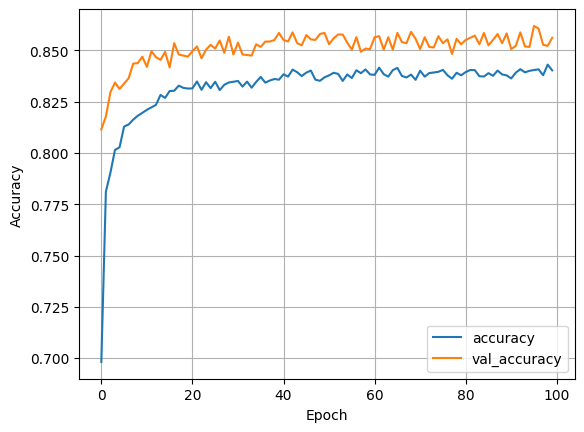

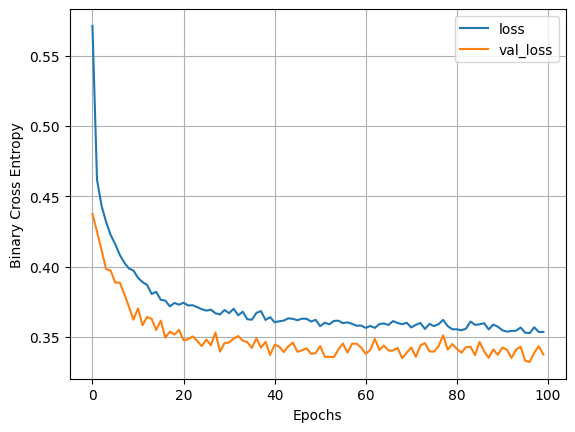

In [ ]:
plot_accuracy(clf)
plot_loss(clf)

#**Regression**

#Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
cols = ["date", "bike_count", "Hour", "Temp", "Humidity", "wind_speed", "visibility", "dew_point", "solar_radiation", "rain", "snow", "seasons", "holiday", "functioning"]
df = pd.read_csv('SeoulBikeData - SeoulBikeData.csv.csv')
df.columns = cols
df = df.drop(['date', 'seasons', 'holiday'], axis=1)
df.head()

,bike_count,Hour,Temp,Humidity,wind_speed,visibility,dew_point,solar_radiation,rain,snow,functioning
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [ ]:
df['functioning'] = df['functioning'].apply(lambda x: 0 if x == 'Yes' else 1)
df = df[df['Hour'] == 12]
df = df.drop(['Hour'], axis=1)
df.head()

,bike_count,Temp,Humidity,wind_speed,visibility,dew_point,solar_radiation,rain,snow,functioning
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


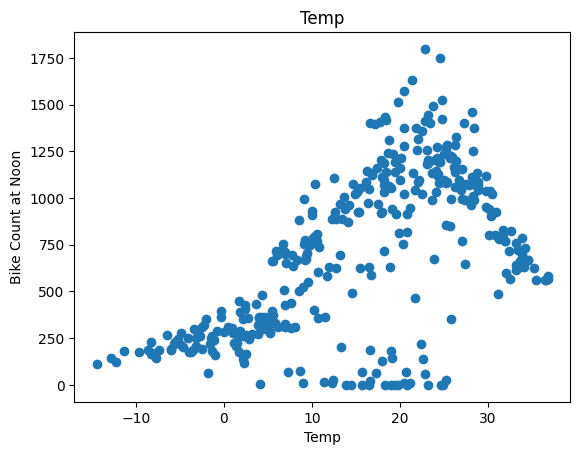

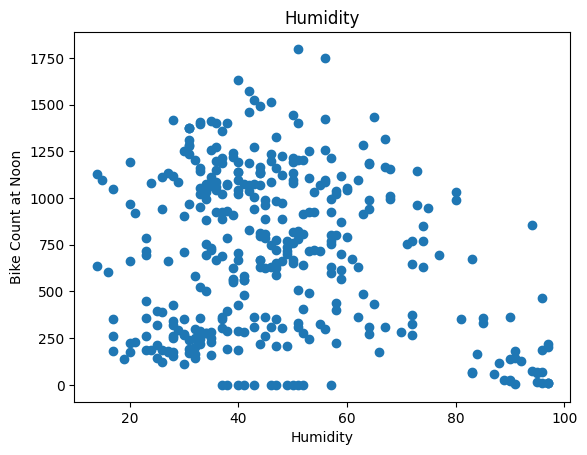

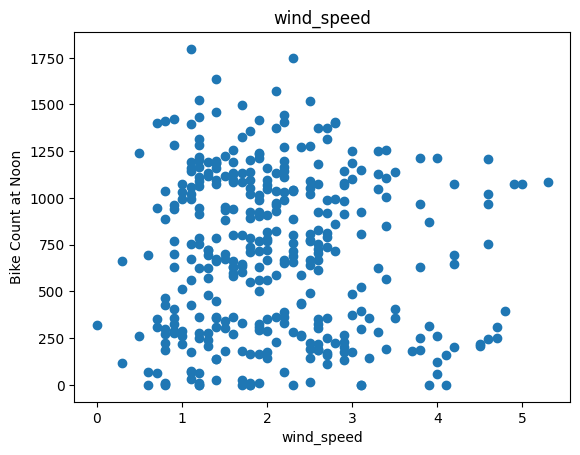

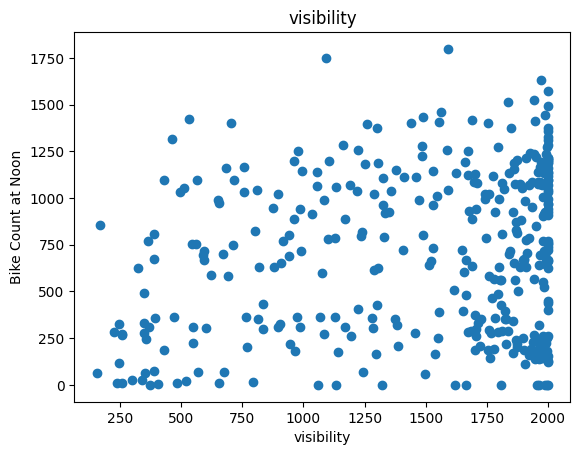

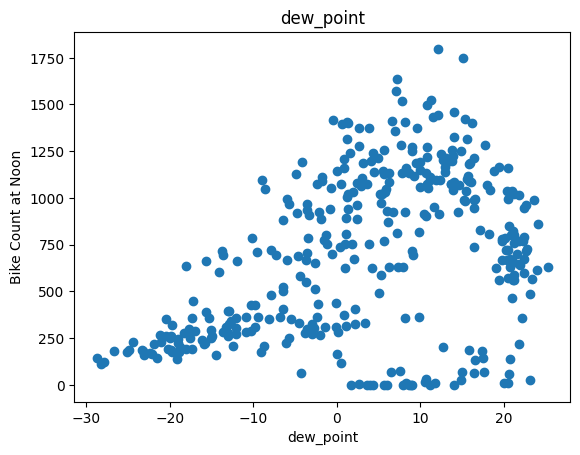

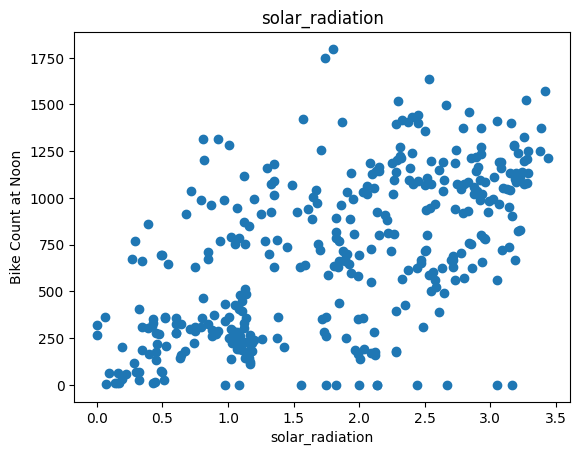

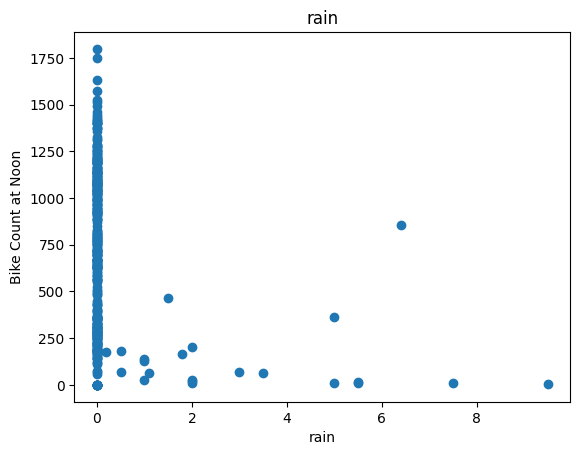

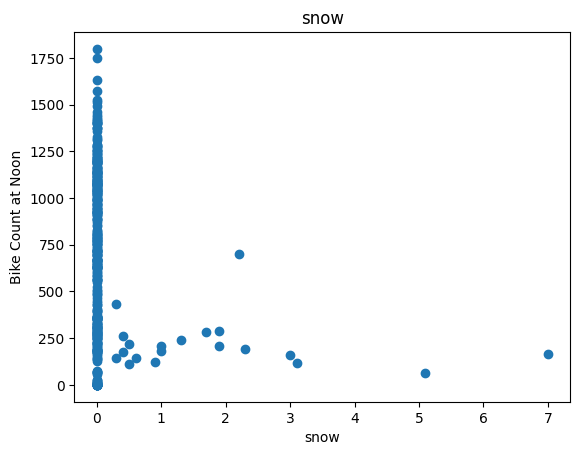

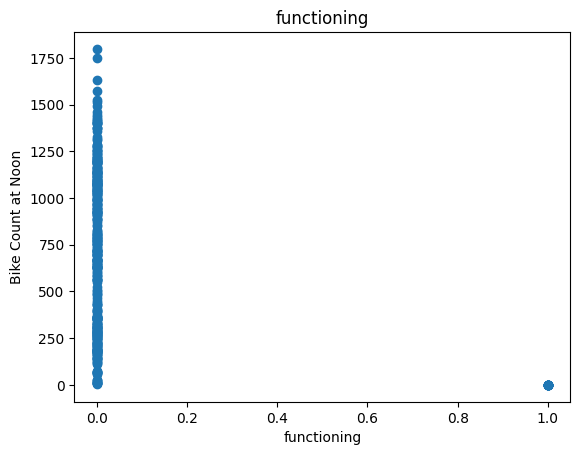

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_count'])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [ ]:
df = df.drop(['wind_speed', 'visibility', 'functioning'], axis=1)

In [ ]:
df.head()

,bike_count,Temp,Humidity,dew_point,solar_radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def get_xy(dataframe, y_label, x_labels=None, oversample=True):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)

  data = np.hstack((X, y))

  return data, X, y

In [ ]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["Temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["Temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["Temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [ ]:
temp_reg.score(X_test_temp, y_test_temp)

0.45305282531613766

In [ ]:
temp_reg.predict(X_test_temp[0].reshape(1, -1))

array([[934.45348089]])

In [ ]:
y_test_temp[0]

array([1237])

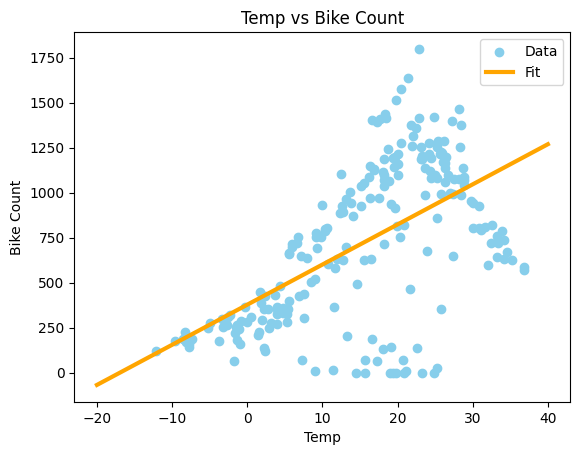

In [ ]:
plt.scatter(X_train_temp, y_train_temp, color="skyblue", label="Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), color="orange", label="Fit", linewidth=3)
plt.legend()
plt.title("Temp vs Bike Count")
plt.ylabel("Bike Count")
plt.xlabel("Temp")
plt.show()

#Multiple Linear Regression

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.506502308405335

#**Regression with Neural Nets**

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
clf = temp_nn_model.fit(X_train_temp, y_train_temp, verbose=0, epochs=1000, batch_size=32, validation_data=(X_val_temp, y_val_temp))

In [ ]:
def plot_loss(clf):
  plt.plot(clf.history['loss'], label='loss')
  plt.plot(clf.history['val_loss'], label='val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

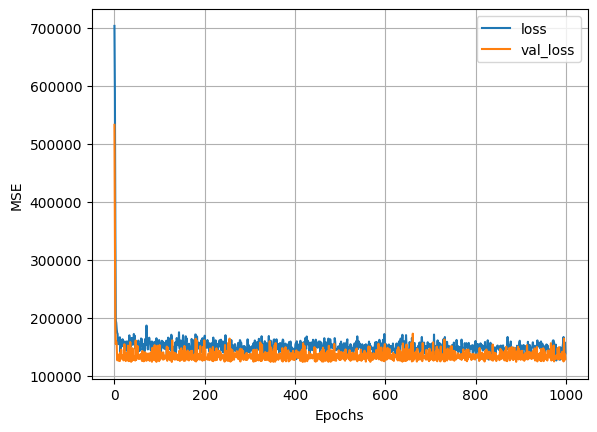

In [ ]:
plot_loss(clf)

In [ ]:
temp_nn_model.evaluate(X_test_temp, y_test_temp)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 102626.3984


101503.5390625

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


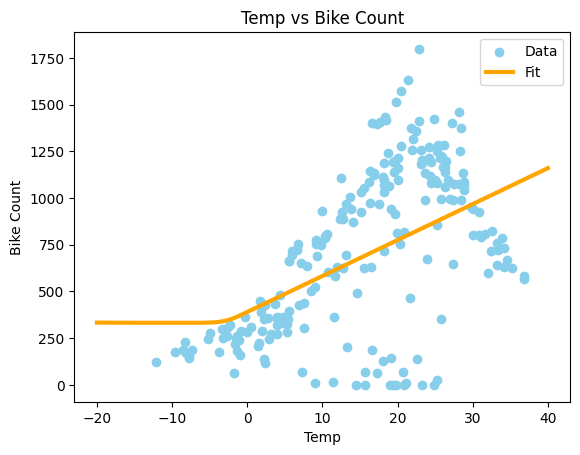

In [ ]:
plt.scatter(X_train_temp, y_train_temp, color="skyblue", label="Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color="orange", linewidth=3)
plt.legend()
plt.title("Temp vs Bike Count")
plt.ylabel("Bike Count")
plt.xlabel("Temp")
plt.show()

# Regression with Neural Nets (Multiple Features)

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [ ]:
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
clf_all = all_nn_model.fit(X_train_all, y_train_all, verbose=0, epochs=1000, batch_size=32, validation_data=(X_val_all, y_val_all))

In [ ]:
all_nn_model.evaluate(X_test_all, y_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 101566.8594


98850.9609375

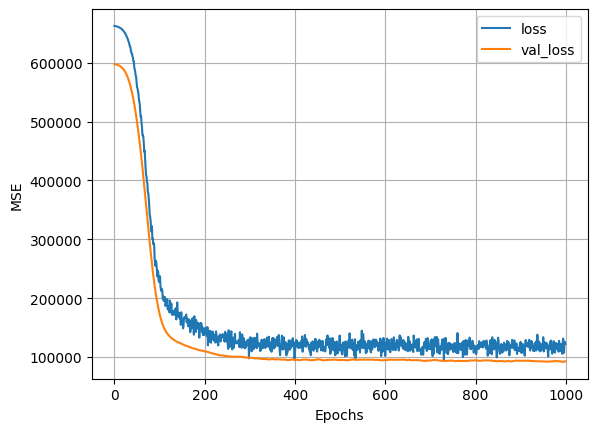

In [ ]:
plot_loss(clf_all)

In [ ]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = all_nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
def MSE(y_pred, y_real):
  return np.square(y_pred - y_real).mean()

In [ ]:
MSE(y_pred_lr, y_test_all)

np.float64(97615.33972613572)

In [ ]:
MSE(y_pred_nn, y_test_all)

np.float64(98850.95239548161)

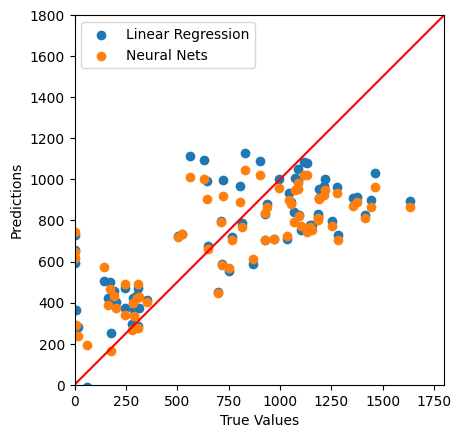

In [ ]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label='Linear Regression')
plt.scatter(y_test_all, y_pred_nn, label='Neural Nets')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c="red")
plt.legend()
plt.show()